In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
faults = pd.read_csv('데이터셋/faults_mini.csv')

In [3]:
faults

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,42,270900,267,80,1,0,0
1,1084,185575,108,40,0,0,1
2,1109,1170194,130,175,0,1,0
3,190,210936,132,150,1,0,0
4,330,429227,264,150,1,0,0
5,74,779144,1506,150,1,0,0
6,51,585861,139,70,0,1,0
7,397,604478,444,70,0,1,0
8,43,366881,4048,40,0,0,1
9,48,377537,3985,40,0,0,1


In [4]:
faults.describe()

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,336.800000,4.980733e+05,1102.300000,96.500000,0.400000,0.300000,0.300000
std,419.946769,3.014717e+05,1591.202973,53.750969,0.516398,0.483046,0.483046
min,42.000000,1.855750e+05,108.000000,40.000000,0.000000,0.000000,0.000000
25%,48.750000,2.948952e+05,133.750000,47.500000,0.000000,0.000000,0.000000
50%,132.000000,4.033820e+05,265.500000,75.000000,0.000000,0.000000,0.000000
75%,380.250000,5.998238e+05,1240.500000,150.000000,1.000000,0.750000,0.750000
max,1109.000000,1.170194e+06,4048.000000,175.000000,1.000000,1.000000,1.000000


In [5]:
import numpy as np

In [6]:
var_x = np.random.randint(0,7,size=99)
var_x_outlier = 100

var_x = np.hstack([var_x,var_x_outlier])
var_y = np.random.randint(0,40,size = 100)

In [7]:
print(var_x)
print("=========================")
print(var_y)

[  5   1   2   0   1   5   4   4   3   2   4   2   1   5   4   5   5   3
   0   6   2   0   0   2   0   5   6   1   3   5   4   5   1   5   5   6
   2   1   4   5   6   5   4   5   5   2   4   4   3   1   2   1   1   0
   1   4   3   6   6   0   1   4   3   5   6   3   6   5   1   0   5   5
   4   4   0   0   0   6   6   1   3   6   6   4   0   4   0   6   1   1
   2   5   0   0   5   6   1   4   2 100]
[27 21 18 31 28 16  4 35 32 38 39 38  1 12  7 22 15  1 24  5 12  9  8 21
 12 29  1  2  2 16 21  2  9  2 18 27  6 32 30 36  8  3 17 32 20 27 23 21
 12 35 11 16  1 37 23 12 23 12  1 13 15  9  8  2 16 16 23 37 24 31  2 34
 29 35 23 30 39 18 13  0 15  2 15 21 12 16 22 14  9  6 11 16 20 17  2 38
 26  8 29 35]


In [8]:
var_x_norm = (var_x - var_x.min())/(var_x.max() - var_x.min())
var_y_norm = (var_y - var_y.min())/(var_y.max() - var_y.min())

print("var_x_norm :", var_x_norm[:10])
print("var_y_norm :", var_y_norm[:10])

var_x_norm : [0.05 0.01 0.02 0.   0.01 0.05 0.04 0.04 0.03 0.02]
var_y_norm : [0.69230769 0.53846154 0.46153846 0.79487179 0.71794872 0.41025641
 0.1025641  0.8974359  0.82051282 0.97435897]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [10]:
warnings.filterwarnings('ignore')

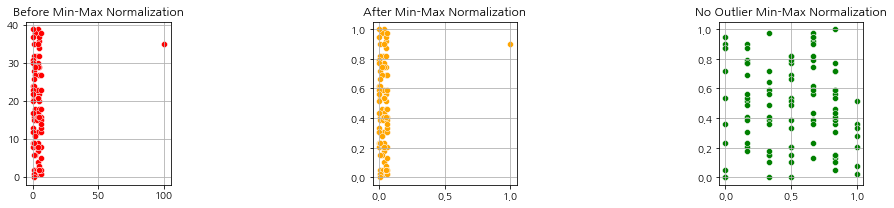

In [11]:
plt.figure(figsize=(15,3))

plt.subplot(1,5,1)
sns.scatterplot(var_x, var_y, color = 'red')
plt.title("Before Min-Max Normalization")
plt.grid()

plt.subplot(1,5,3)
sns.scatterplot(var_x_norm, var_y_norm, color = 'orange')
plt.title("After Min-Max Normalization")
plt.grid()


var_x = np.random.randint(0,7, size = 100)
var_y = np.random.randint(0,40, size = 100)

var_x_nrom = (var_x - var_x.min()) / (var_x.max() - var_x.min())
var_y_nrom = (var_y - var_y.min()) / (var_y.max() - var_y.min())

plt.subplot(1,5,5)

sns.scatterplot(var_x_nrom, var_y_nrom, color = 'green')
plt.title("No Outlier Min-Max Normalization")
plt.grid()

plt.show()

In [12]:
faults_norm = (faults - faults.min()) / (faults.max()-faults.min())
faults_norm.head()

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,0.000000,0.086658,0.040355,0.296296,1.0,0.0,0.0
1,0.976570,0.000000,0.000000,0.000000,0.0,0.0,1.0
2,1.000000,1.000000,0.005584,1.000000,0.0,1.0,0.0
3,0.138707,0.025757,0.006091,0.814815,1.0,0.0,0.0
4,0.269916,0.247458,0.039594,0.814815,1.0,0.0,0.0


In [13]:
faults_norm.describe()

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.276289,0.317380,0.252360,0.418519,0.400000,0.300000,0.300000
std,0.393577,0.306181,0.403859,0.398155,0.516398,0.483046,0.483046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006326,0.111028,0.006536,0.055556,0.000000,0.000000,0.000000
50%,0.084349,0.221209,0.039975,0.259259,0.000000,0.000000,0.000000
75%,0.317010,0.420720,0.287437,0.814815,1.000000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
print(faults_norm.head())
faults_shuffle = faults_norm.sample(frac=1)
print("===================================")
print(faults_shuffle.head)

   X_Minimum  Y_Minimum  Pixels_Areas  Steel_Plate_Thickness  Pastry  \
0   0.000000   0.086658      0.040355               0.296296     1.0   
1   0.976570   0.000000      0.000000               0.000000     0.0   
2   1.000000   1.000000      0.005584               1.000000     0.0   
3   0.138707   0.025757      0.006091               0.814815     1.0   
4   0.269916   0.247458      0.039594               0.814815     1.0   

   Z_Scratch  K_Scatch  
0        0.0       0.0  
1        0.0       1.0  
2        1.0       0.0  
3        0.0       0.0  
4        0.0       0.0  
<bound method NDFrame.head of    X_Minimum  Y_Minimum  Pixels_Areas  Steel_Plate_Thickness  Pastry  \
6   0.008435   0.406539      0.007868               0.222222     0.0   
0   0.000000   0.086658      0.040355               0.296296     1.0   
9   0.005623   0.194961      0.984010               0.000000     0.0   
5   0.029991   0.602841      0.354822               0.814815     1.0   
8   0.000937   0.184138    

In [15]:
faults_np = faults_norm.to_numpy()
print(type(faults_np))
print(faults_np[:5])

<class 'numpy.ndarray'>
[[0.         0.08665788 0.04035533 0.2962963  1.         0.
  0.        ]
 [0.97656982 0.         0.         0.         0.         0.
  1.        ]
 [1.         1.         0.00558376 1.         0.         1.
  0.        ]
 [0.13870665 0.02575717 0.00609137 0.81481481 1.         0.
  0.        ]
 [0.26991565 0.24745815 0.03959391 0.81481481 1.         0.
  0.        ]]


In [55]:
train_ratio = 0.8
input_cnt = 4
output_cnt = 3

train_idx = int(len((faults_np)) * train_ratio)
print("train_idx:", train_idx)
print("test_idx:",len(faults)-train_idx)

train_idx: 8
test_idx: 2


In [56]:
train_X, train_Y = faults_np[:train_idx, :-output_cnt], faults_np[:train_idx, -output_cnt:]
test_X, test_Y = faults_np[train_idx:, :-output_cnt], faults_np[train_idx:, -output_cnt:]

In [57]:
print(train_X)
print(train_Y)
print('='*60)
print(test_X)
print(test_Y)

[[0.         0.08665788 0.04035533 0.2962963 ]
 [0.97656982 0.         0.         0.        ]
 [1.         1.         0.00558376 1.        ]
 [0.13870665 0.02575717 0.00609137 0.81481481]
 [0.26991565 0.24745815 0.03959391 0.81481481]
 [0.02999063 0.6028413  0.35482234 0.81481481]
 [0.00843486 0.40653898 0.00786802 0.22222222]
 [0.33270853 0.4254468  0.08527919 0.22222222]]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[9.37207123e-04 1.84138230e-01 1.00000000e+00 0.00000000e+00]
 [5.62324274e-03 1.94960690e-01 9.84010152e-01 0.00000000e+00]]
[[0. 0. 1.]
 [0. 0. 1.]]


In [58]:
simple_layer_model = tf.keras.Sequential([tf.keras.layers.Dense(units=3, activation = 'softmax',input_shape=(4,) )]) #완전 연결 계층

In [59]:
simple_layer_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [60]:
simple_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [61]:
history_1 = simple_layer_model.fit(train_X, train_Y, epochs=25, batch_size = 2)

Epoch 1/25
4/4 [==============================] - 0s 998us/step - loss: 1.5781 - accuracy: 0.0000e+00
Epoch 2/25
4/4 [==============================] - 0s 1ms/step - loss: 1.5720 - accuracy: 0.0000e+00
Epoch 3/25
4/4 [==============================] - 0s 665us/step - loss: 1.5655 - accuracy: 0.0000e+00
Epoch 4/25
4/4 [==============================] - 0s 665us/step - loss: 1.5602 - accuracy: 0.0000e+00
Epoch 5/25
4/4 [==============================] - 0s 665us/step - loss: 1.5541 - accuracy: 0.0000e+00
Epoch 6/25
4/4 [==============================] - 0s 664us/step - loss: 1.5472 - accuracy: 0.0000e+00
Epoch 7/25
4/4 [==============================] - 0s 333us/step - loss: 1.5426 - accuracy: 0.0000e+00
Epoch 8/25
4/4 [==============================] - 0s 665us/step - loss: 1.5353 - accuracy: 0.0000e+00
Epoch 9/25
4/4 [==============================] - 0s 665us/step - loss: 1.5293 - accuracy: 0.0000e+00
Epoch 10/25
4/4 [==============================] - 0s 998us/step - loss: 1.5242 - ac

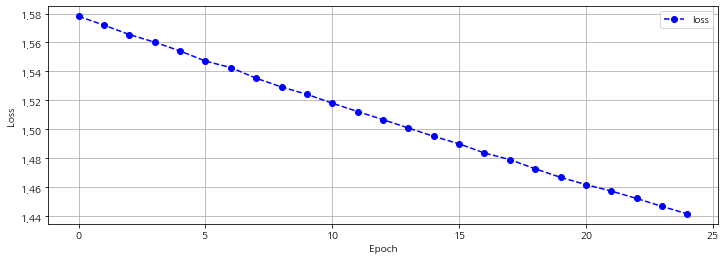

In [62]:
plt.figure(figsize=(12,4))
plt.plot(history_1.history['loss'], 'b--o', label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [63]:
simple_layer_model.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 83ms/step - loss: 0.7117 - accuracy: 1.0000


[0.7116577625274658, 1.0]

In [64]:
pred_Y = simple_layer_model.predict(test_X)
print("pred_Y : \n", pred_Y) #test데이터 2개 였으니까 값이 두줄로

pred_Y : 
 [[0.13368541 0.37417802 0.49213654]
 [0.13514099 0.37533242 0.4895266 ]]


In [65]:
pred_Y = np.argmax(pred_Y, axis=1)
print("pred_Y:", pred_Y)

pred_Y: [2 2]


In [66]:
test_Y = np.argmax(test_Y, axis = 1)
print("test_Y: ", test_Y)

test_Y:  [2 2]


In [68]:
acc = np.mean(np.equal(pred_Y, test_Y))
print("ACC : {} %".format(acc*100))

ACC : 100.0 %


In [ ]:
#############################################################################################################

In [111]:
df_dataset = pd.read_csv("데이터셋/faults.csv")
print(df_dataset.shape)
print(df_dataset.info())

(1941, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float6

In [112]:
faults_norm=(df_dataset-df_dataset.min()) / (df_dataset.max() - df_dataset.min())

In [113]:
faults_norm.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.334977,0.359254,0.126645,0.126648,0.012393,0.010515,0.004516,0.017778,0.416496,0.431452,...,0.541831,0.528699,0.529422,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,0.305390,0.291180,0.136706,0.136707,0.033858,0.028832,0.023496,0.044197,0.158297,0.086532,...,0.252619,0.090656,0.385303,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029912,0.110006,0.035786,0.035788,0.000537,0.001244,0.000661,0.000800,0.310345,0.402778,...,0.331719,0.489884,0.146652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.255132,0.270919,0.092244,0.092244,0.001127,0.002297,0.001322,0.001635,0.443350,0.416667,...,0.547839,0.527666,0.439614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617595,0.624927,0.167658,0.167658,0.005372,0.007849,0.004518,0.007140,0.522167,0.476852,...,0.757855,0.568129,0.999773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
print(faults_norm.head())
faults_shuffle = faults_norm.sample(frac = 1) #frac = 1전체데이터를 다쓸거다 (0.5면 절반만)

   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0.024633   0.026916   0.020352   0.020354      0.001736     0.001436   
1   0.378299   0.378584   0.195006   0.195007      0.000694     0.000766   
2   0.486217   0.486249   0.119190   0.119190      0.000452     0.000574   
3   0.500293   0.500878   0.027938   0.027940      0.001140     0.001053   
4   0.756012   0.761849   0.037853   0.037872      0.015768     0.005552   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0     0.002369           0.002068               0.374384   
1     0.001598           0.000962               0.413793   
2     0.000992           0.000666               0.487685   
3     0.002424           0.001617               0.487685   
4     0.014269           0.021282               0.182266   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0               0.328704  ...           0.912493          0.431200   
1               0.398148  ...           0.

In [115]:
print(faults_shuffle)

      X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
461    0.024047   0.112932   0.115983   0.115996      0.093722     0.075716   
1746   0.534311   0.535986   0.026046   0.026046      0.000341     0.000957   
1166   0.651613   0.656524   0.017848   0.017848      0.001074     0.001436   
549    0.030499   0.099473   0.021181   0.021183      0.024245     0.017708   
1508   0.717889   0.727911   0.009750   0.009753      0.003007     0.005935   
...         ...        ...        ...        ...           ...          ...   
893    0.560117   0.561147   0.055828   0.055828      0.000210     0.000766   
1220   0.620528   0.631949   0.270841   0.270841      0.001271     0.003446   
1432   0.384164   0.390872   0.324024   0.324024      0.001363     0.001532   
1391   0.166569   0.206554   0.175610   0.175609      0.001310     0.006796   
1504   0.172434   0.196606   0.037786   0.037810      0.031824     0.038671   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Lu

34


In [130]:
faults_np = faults_shuffle.to_numpy()
print(faults_np[:3])
print(type(faults_np))

[[2.40469208e-02 1.12931539e-01 1.15982660e-01 1.15996203e-01
  9.37223638e-02 7.57155164e-02 2.57837034e-02 1.43349279e-01
  1.52709360e-01 4.81481481e-01 3.08641975e-01 0.00000000e+00
  1.00000000e+00 0.00000000e+00 5.87821543e-02 5.47939400e-01
  8.19501865e-01 1.25571821e-01 1.84963474e-01 3.74842371e-01
  1.00000000e+00 7.89440269e-01 6.82305002e-01 5.35069387e-01
  5.90053967e-01 5.52224254e-01 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.34310850e-01 5.35985957e-01 2.60464008e-02 2.60462086e-02
  3.40641848e-04 9.57212597e-04 5.50933833e-04 3.89175755e-04
  3.89162562e-01 3.00925926e-01 2.31040564e-01 1.00000000e+00
  0.00000000e+00 1.00000000e+00 6.48211415e-01 4.23773705e-01
  8.99163053e-01 5.83257091e-03 7.46347403e-01 9.04476671e-01
  1.00000000e+00 2.93157474e-01 2.35548664e-01 2.34813441e-01
  5.50259747e-01 4.19073736e-01 8.67196368e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.000

In [143]:
train_ratio = 0.9
input_cnt = 27
output_cnt = 7

train_idx = int(len(faults_np) * train_ratio)
print("train_idx : ", train_idx)
print("test_idx : ", len(faults_np)-train_idx)

train_idx :  1746
test_idx :  195


In [144]:
train_X, train_Y = faults_np[:train_idx, :-output_cnt], faults_np[:train_idx, -output_cnt:]
test_X, test_Y = faults_np[train_idx:,:-output_cnt], faults_np[train_idx:, -output_cnt:]

In [32]:
#모델 만들어보기

In [150]:
import tensorflow as tf

In [151]:
multi_layer_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation = 'relu', input_shape=(27,)),
    tf.keras.layers.Dense(units=24, activation = 'relu'),
    tf.keras.layers.Dense(units=12, activation = 'relu'),
    tf.keras.layers.Dense(units=7, activation = 'softmax')
])

In [152]:
multi_layer_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 48)                1344      
_________________________________________________________________
dense_12 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_13 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 91        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


In [153]:
multi_layer_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),loss = 'categorical_crossentropy')

In [154]:
history_2 = multi_layer_model.fit(train_X, train_Y, epochs= 200, batch_size = 10)

Epoch 1/200
175/175 [==============================] - 0s 460us/step - loss: 1.2760
Epoch 2/200
175/175 [==============================] - 0s 414us/step - loss: 1.0895
Epoch 3/200
175/175 [==============================] - 0s 506us/step - loss: 1.0218
Epoch 4/200
175/175 [==============================] - 0s 460us/step - loss: 0.9929
Epoch 5/200
175/175 [==============================] - 0s 414us/step - loss: 0.9465
Epoch 6/200
175/175 [==============================] - 0s 414us/step - loss: 0.9169
Epoch 7/200
175/175 [==============================] - 0s 460us/step - loss: 0.8760
Epoch 8/200
175/175 [==============================] - 0s 414us/step - loss: 0.8210
Epoch 9/200
175/175 [==============================] - 0s 460us/step - loss: 0.8066
Epoch 10/200
175/175 [==============================] - 0s 460us/step - loss: 0.7856
Epoch 11/200
175/175 [==============================] - 0s 460us/step - loss: 0.7645
Epoch 12/200
175/175 [==============================] - 0s 439us/step - lo

In [155]:
multi_layer_model.evaluate(test_X, test_Y)

7/7 [==============================] - 0s 0s/step - loss: 1.1433


1.1433391571044922

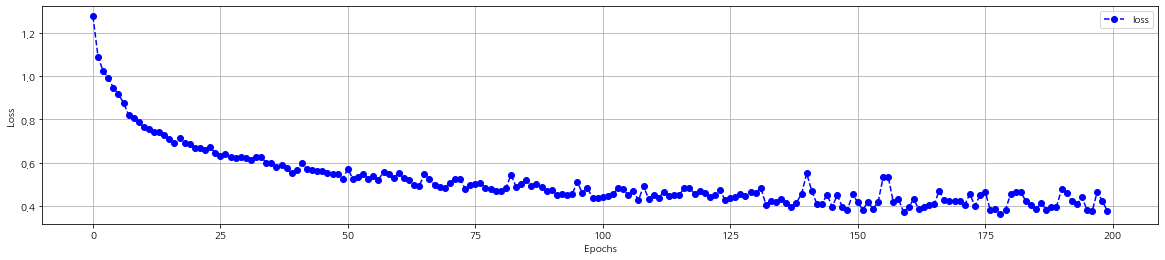

In [156]:
plt.figure(figsize=(20,4))
plt.plot(history_2.history['loss'], 'b--o', label = 'loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.show()


In [157]:
pred_Y = multi_layer_model.predict(test_X)
print("pred_Y:",pred_Y)

pred_Y: [[9.91700947e-01 5.56524753e-25 2.83062000e-05 ... 1.84130450e-24
  3.12727730e-04 7.95800705e-03]
 [3.89726059e-14 1.61087166e-09 9.99797881e-01 ... 7.25966804e-30
  1.16094476e-07 2.02027106e-04]
 [3.23713902e-14 9.53888635e-10 9.99816120e-01 ... 4.12761958e-30
  9.20308381e-08 1.83831537e-04]
 ...
 [4.47655907e-07 1.02131441e-26 4.52156090e-10 ... 6.68214984e-26
  9.62469399e-01 3.75298671e-02]
 [5.16470709e-06 2.57415161e-12 3.58407898e-03 ... 1.44650861e-36
  6.81815494e-04 9.95721459e-01]
 [4.15448767e-06 7.01173541e-31 3.41669332e-27 ... 1.31554287e-08
  4.01179854e-08 9.99995828e-01]]


In [158]:
pred_Y = np.argmax(pred_Y, axis = 1)
print("pred_Y : \n",pred_Y)

pred_Y : 
 [0 2 2 2 2 6 6 5 5 6 6 6 6 1 6 2 6 2 0 6 1 3 5 2 2 6 0 6 5 1 5 6 2 5 6 6 6
 5 2 2 1 0 6 5 1 6 6 6 5 6 6 6 5 5 3 6 2 5 5 5 3 6 1 1 4 2 6 6 6 5 2 6 1 2
 6 6 6 6 6 2 6 6 6 6 6 2 6 2 6 1 5 1 2 5 2 2 6 6 5 0 5 6 2 5 2 2 1 6 6 1 6
 2 2 2 6 6 2 1 2 2 6 2 3 6 2 5 5 4 6 2 2 6 2 5 2 6 6 6 1 0 2 6 6 5 1 2 5 6
 5 6 6 6 6 2 6 6 2 6 6 0 6 2 6 6 6 6 0 3 0 2 2 4 5 0 1 2 2 2 6 1 5 2 6 5 1
 6 6 6 6 6 5 5 5 6 6]


In [159]:
test_Y = np.argmax(test_Y, axis=1)
print("test_Y : \n", test_Y)

test_Y : 
 [6 2 2 2 2 6 6 5 5 6 6 6 6 6 2 2 6 2 0 0 1 3 4 2 2 6 0 6 5 1 5 6 2 5 0 1 5
 5 2 2 1 0 6 6 1 5 6 1 5 6 6 6 5 5 3 6 2 5 5 5 3 5 1 1 4 2 5 6 6 5 2 6 1 2
 6 5 0 6 6 2 6 2 6 0 6 2 6 2 5 1 5 1 2 5 2 2 6 6 5 6 1 6 6 5 2 2 1 6 6 1 5
 2 2 2 5 6 2 1 2 2 6 2 3 0 2 5 6 4 5 2 2 2 2 5 2 6 6 5 1 0 2 6 4 5 1 6 6 0
 5 0 6 6 6 2 6 6 2 6 0 0 5 2 6 6 6 6 6 3 0 2 2 6 6 0 1 2 2 2 6 1 5 2 5 5 1
 5 0 6 0 6 5 5 6 6 6]


In [161]:
acc = np.mean(np.equal(pred_Y, test_Y))

print(f"ACC: {acc*100:.2f}%")

ACC: 77.95%
